In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("loan.csv")

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Analysing Target column (loan_status)

From our business problem, we are classifying whether the customer is a default (Charged Off) or non-default (Fully Paid).
Hence we can drop all the 'Current' customers

In [4]:
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [5]:
df = df[df.loan_status != 'Current']

In [6]:
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='percent'>

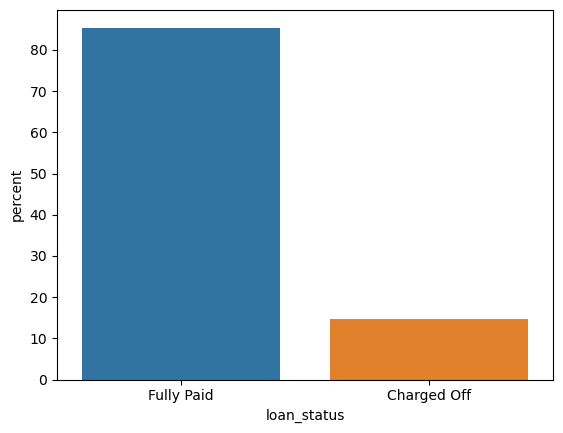

In [7]:
sns.countplot(df, x="loan_status", hue="loan_status", stat="percent")

In [8]:
df.shape

(38577, 111)

# Data Cleaning and Manipulation

Check for columns containing only null values

In [9]:
df.isna().all(axis=0).sum()

55

Check for rows containing all null values

In [10]:
df.isna().all(axis=1).sum()

0

- There are 55 columns having only null values and can be dropped

- There are 0 rows having only null values

Removing those 55 columns by extracting column names are dropping them

In [11]:
null_cols = []
for col in df.columns:
  if df[col].isna().all():
    null_cols.append(col)
print(null_cols)

['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total

In [12]:
df.drop(columns=null_cols, axis=1, inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Checking for duplicate data/rows

No duplicate rows found

In [13]:
df.duplicated().sum()

0

Print datatypes of each columns in DataFrame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  38577 no

Calculating statistical data using 'describe()' method for numeric values of our DataFrame

In [15]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,...,38577.000000,38577.000000,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,...,98.035545,12.772728,2746.243218,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,...,698.650182,150.836853,4494.648131,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,...,0.000000,0.000000,217.420000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,...,0.000000,0.000000,568.260000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,...,0.000000,0.000000,3447.250000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


From the above statistical analysis, we can drop columns that dosen't support our analysis

In [16]:
# Dropping columns that contain majority unique values or null values

cols_to_drop = ['id', 'member_id', 'emp_title', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'url', 'zip_code', 'tax_liens']
df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  object 
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_length                  37544 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  issue_d                     38577 non-null  object 
 13  loan_status                 38577 no

# Handeling Missing Values

### Analysing Categorical Columns

Seggragating column names containg all categorical value datatypes ("object")

In [18]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'earliest_cr_line',
       'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

Extracting column names by datatype - object and contain Null values

In [19]:
cat_na_cols = []
for col in cat_cols:
  if df[col].isna().sum() > 0:
    cat_na_cols.append(col)
cat_na_cols

['emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']

In [20]:
df.emp_length.isna().sum()

1033

In [21]:
print(df.emp_length.unique(), "\n", df.emp_length.unique().size)

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan] 
 12


In [22]:
df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

##### Observation

There are 1033 null values in emp_length column

Replace null value rows with df.emp_length.mode()

In [23]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace=True)

In [24]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [25]:
df.title.isna().sum()

11

In [26]:
print(df.title.unique(), "\n", df.title.unique().size)

['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan'] 
 19298


Dropping 'title' colunm as it contains more unique values

In [27]:
df.drop(columns=["title"], axis=1, inplace=True)

In [28]:
df.revol_util.isna().sum()

50

<Axes: xlabel='revol_util', ylabel='Count'>

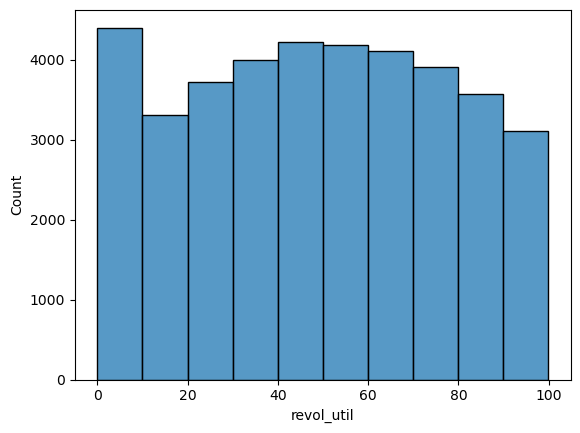

In [29]:
sns.histplot(df.revol_util.dropna().apply(lambda x: float(x.rstrip('%'))), binwidth=10)

##### Observation

There are only a few null values in revol_util column

Since most values in revol_util column reside in 0%, we can replace null value with its 'mode()'

In [30]:
df.revol_util.fillna(df.revol_util.mode()[0], inplace=True)

In [31]:
df.last_pymnt_d.isna().sum()

71

In [32]:
df.last_pymnt_d.unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Apr-16', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [33]:
df[df["last_pymnt_d"].isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
26,15000,15000,8725.0,36 months,14.27%,514.64,C,C2,9 years,RENT,...,NaN,0.0,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2724,8000,8000,3975.0,36 months,14.65%,275.96,C,C3,10+ years,RENT,...,NaN,0.0,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3613,6400,6400,6400.0,60 months,18.25%,163.39,D,D5,5 years,RENT,...,NaN,0.0,Apr-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3985,18000,18000,18000.0,60 months,19.03%,467.23,E,E2,4 years,RENT,...,NaN,0.0,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4206,1800,1800,1800.0,36 months,8.90%,57.16,A,A5,9 years,RENT,...,NaN,0.0,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36185,20000,20000,13975.0,36 months,11.89%,663.28,B,B4,10+ years,MORTGAGE,...,NaN,0.0,Dec-09,0.0,1,INDIVIDUAL,0,0.0,0,0.0
36206,7800,7800,7725.0,36 months,10.95%,255.17,B,B1,< 1 year,RENT,...,NaN,0.0,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
36209,2000,2000,2000.0,36 months,16.00%,70.32,E,E2,< 1 year,RENT,...,NaN,0.0,Dec-09,0.0,1,INDIVIDUAL,0,0.0,0,0.0
36937,25000,25000,11625.0,36 months,13.79%,851.89,C,C5,1 year,MORTGAGE,...,NaN,0.0,Jun-09,0.0,1,INDIVIDUAL,0,0.0,0,0.0


##### Observation

There are a few missing values in last_pymnt_d column

Replace null values in 'last_pymnt_d' column with its mode() value as it may suggest new customers who are applying for first time

In [34]:
df.last_pymnt_d.fillna(df.last_pymnt_d.mode()[0], inplace=True)

In [35]:
df.last_credit_pull_d.isna().sum()

2

In [36]:
df[df.last_credit_pull_d.isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
26025,5000,5000,5000.0,36 months,11.12%,163.98,B,B3,5 years,RENT,...,Jun-12,163.98,NaN,0.0,1,INDIVIDUAL,0,0.0,0,0.0
39476,1000,1000,875.0,36 months,7.12%,30.94,A,A1,< 1 year,MORTGAGE,...,Aug-10,185.80,NaN,0.0,1,INDIVIDUAL,0,0.0,0,NaN


Replace null values in 'last_credit_pull_d' with its mode() value

In [37]:
df.last_credit_pull_d.fillna(df.last_credit_pull_d.mode()[0], inplace=True)

### Analysing Numeric Columns

Seggregating column names containing only Numeric value datatypes ("int64", "float64")

In [38]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

Extracting column names by datatype - "int64", "float64" and contain null values

In [39]:
num_na_cols = []
for col in num_cols:
  if df[col].isna().sum() > 0:
    num_na_cols.append(col)
num_na_cols

['collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies']

In [40]:
df.collections_12_mths_ex_med.isna().sum()

56

In [41]:
df.collections_12_mths_ex_med.describe()

count    38521.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [42]:
df.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    38521
Name: count, dtype: int64

In [43]:
df.drop(columns=["collections_12_mths_ex_med"], axis=1, inplace=True)

##### Observation

Dropping 'collections_12_mths_ex_med' column has it has null and single unique value

In [44]:
df.chargeoff_within_12_mths.isna().sum()

56

In [45]:
df.chargeoff_within_12_mths.describe()

count    38521.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [46]:
df.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    38521
Name: count, dtype: int64

In [47]:
df.drop(columns=["chargeoff_within_12_mths"], axis=1, inplace=True)

##### Observation

Dropping 'chargeoff_within_12_mths' column has it has null and single unique value

In [48]:
df.pub_rec_bankruptcies.isna().sum()

697

In [49]:
df.pub_rec_bankruptcies.describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

<Axes: ylabel='pub_rec_bankruptcies'>

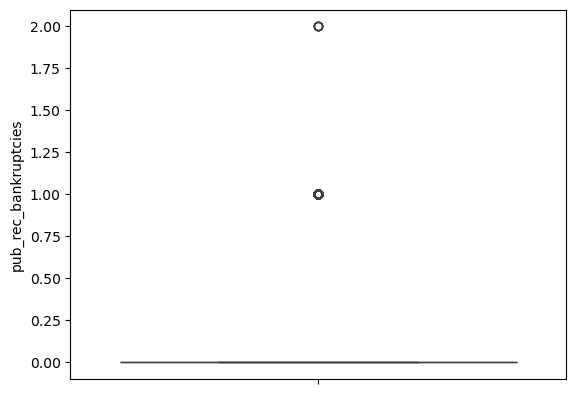

In [50]:
sns.boxplot(df.pub_rec_bankruptcies)

##### Observation

Dropping 'pub_rec_bankruptcies' column has it has null and single unique value

In [51]:
df.drop(columns=["pub_rec_bankruptcies"], axis=1, inplace=True)

In [52]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

Print shape of DataFrame

In [53]:
df.shape

(38577, 43)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               38577 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  pymnt_plan               38

# Outlier Identification and Removal

In [55]:
df.select_dtypes(exclude='object').corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt
loan_amnt,1.000000,0.981790,0.937922,0.932260,0.268999,0.062436,-0.031951,0.012940,0.177200,-0.049997,...,0.847635,0.845870,0.728343,0.047103,0.142789,0.077005,0.474614,NaN,NaN,NaN
funded_amnt,0.981790,1.000000,0.956172,0.958035,0.264798,0.062194,-0.031866,0.012857,0.175682,-0.050576,...,0.864501,0.864082,0.736654,0.049465,0.143452,0.078769,0.478448,NaN,NaN,NaN
funded_amnt_inv,0.937922,0.956172,1.000000,0.905464,0.251981,0.070663,-0.038171,-0.002800,0.162738,-0.051470,...,0.909127,0.838587,0.726736,0.029379,0.130997,0.064282,0.469166,NaN,NaN,NaN
installment,0.932260,0.958035,0.905464,1.000000,0.267842,0.052038,-0.019755,0.011014,0.172893,-0.045706,...,0.817665,0.847762,0.642655,0.058387,0.121463,0.077519,0.413588,NaN,NaN,NaN
annual_inc,0.268999,0.264798,0.251981,0.267842,1.000000,-0.121530,0.022229,0.035465,0.156927,-0.017864,...,0.245198,0.256848,0.185056,0.006814,0.022184,0.015981,0.143242,NaN,NaN,NaN
dti,0.062436,0.062194,0.070663,0.052038,-0.121530,1.000000,-0.033347,0.002178,0.287849,-0.004742,...,0.066277,0.036755,0.103104,-0.011412,0.026162,0.011744,0.008566,NaN,NaN,NaN
delinq_2yrs,-0.031951,-0.031866,-0.038171,-0.019755,0.022229,-0.033347,1.000000,0.008733,0.011649,0.007623,...,-0.029608,-0.038447,0.023778,0.028772,0.012443,0.014077,-0.012511,NaN,NaN,NaN
inq_last_6mths,0.012940,0.012857,-0.002800,0.011014,0.035465,0.002178,0.008733,1.000000,0.093434,0.023726,...,-0.018589,-0.021328,0.026549,0.030741,0.018899,0.012388,0.027772,NaN,NaN,NaN
open_acc,0.177200,0.175682,0.162738,0.172893,0.156927,0.287849,0.011649,0.093434,1.000000,0.000028,...,0.152008,0.159997,0.123478,-0.018827,0.017241,0.006674,0.082396,NaN,NaN,NaN
pub_rec,-0.049997,-0.050576,-0.051470,-0.045706,-0.017864,-0.004742,0.007623,0.023726,0.000028,1.000000,...,-0.053077,-0.064362,-0.004312,-0.002108,-0.005800,-0.005731,-0.033440,NaN,NaN,NaN


count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64


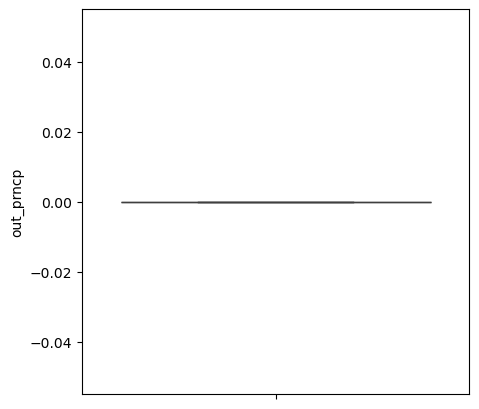

count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64


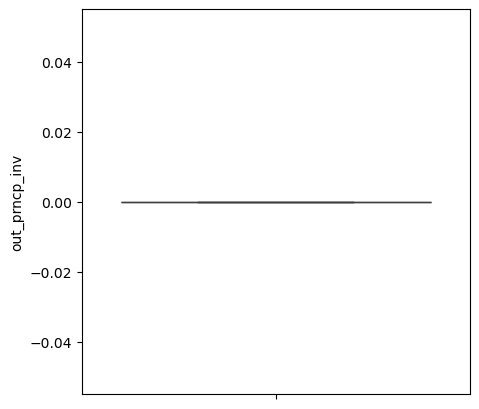

count    38577.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64


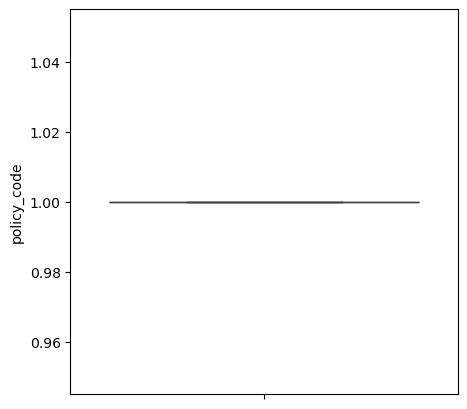

count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64


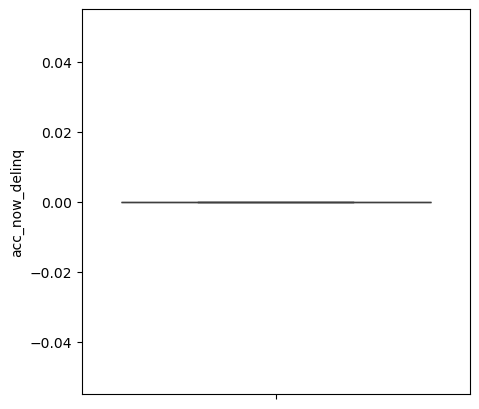

count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: delinq_amnt, dtype: float64


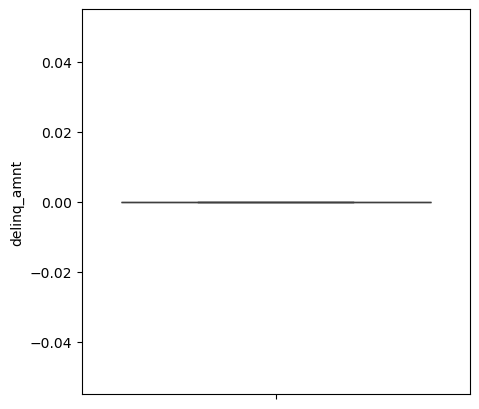

In [56]:
#selecting cols that shows correlation as "NaN" for analysis

cols = ["out_prncp", "out_prncp_inv", "policy_code", "acc_now_delinq", "delinq_amnt"]

for col in cols:
  print(df[col].describe())
  plt.figure(figsize=(5,5))
  sns.boxplot(df[col])
  plt.show()

##### Observation

Since all values in each columns are same, they do not help in analysis and can be dropped

In [57]:
df.drop(columns=cols, axis=1, inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               38577 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  pymnt_plan               38

Identifying outliers using boxplots for categotical data

No of unique values in the column:  2


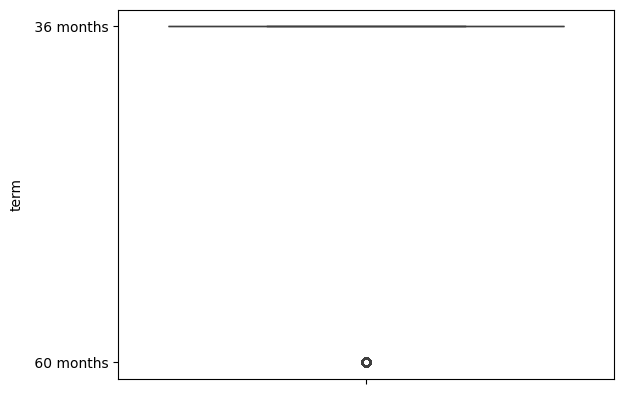



No of unique values in the column:  370


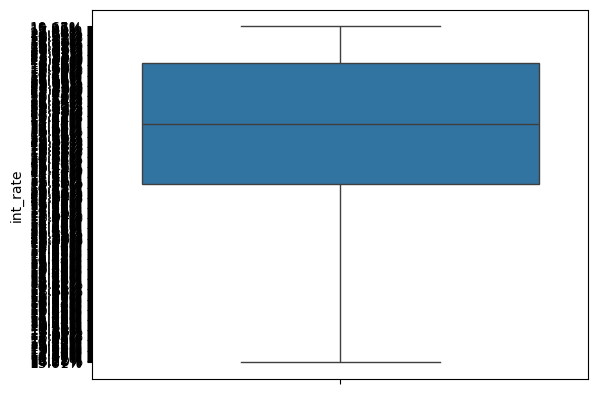



No of unique values in the column:  7


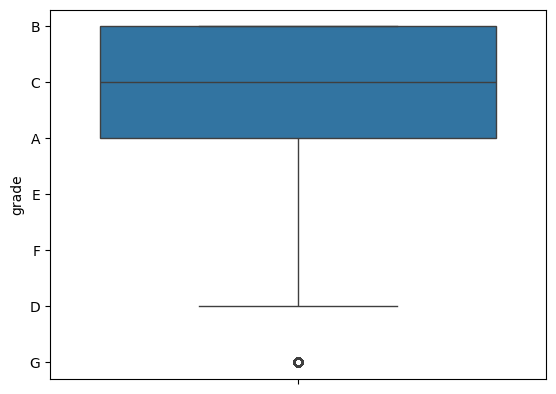



No of unique values in the column:  35


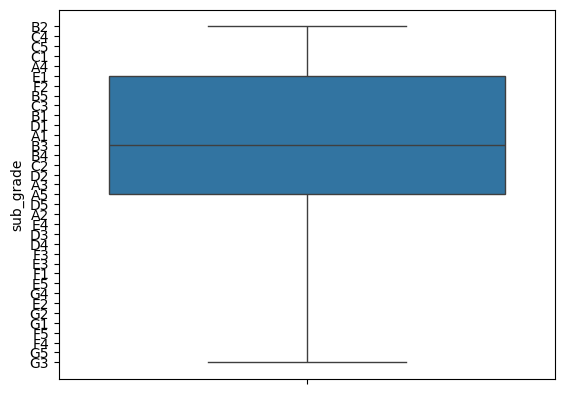



No of unique values in the column:  11


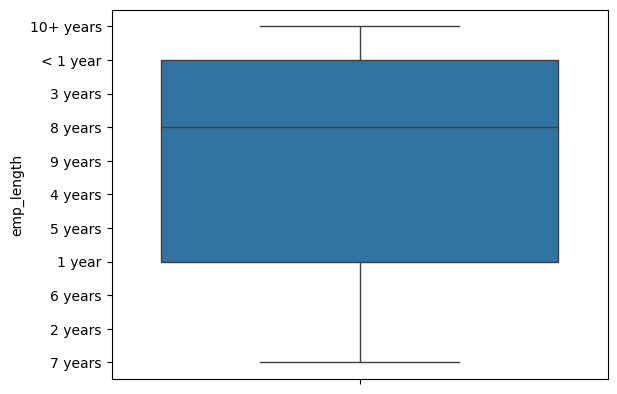



No of unique values in the column:  5


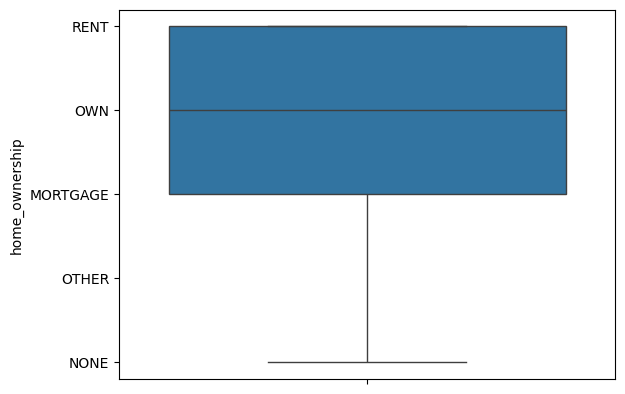



No of unique values in the column:  3


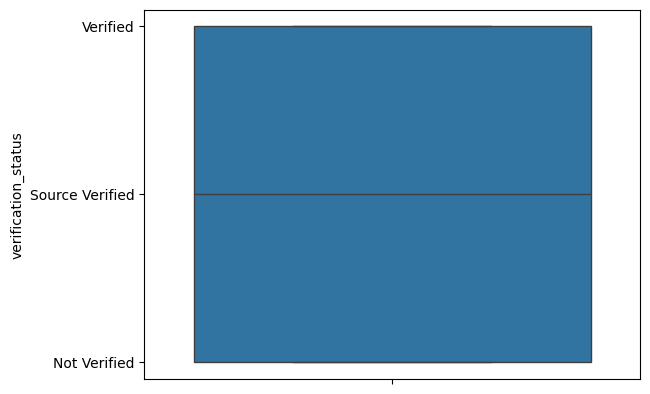



No of unique values in the column:  55


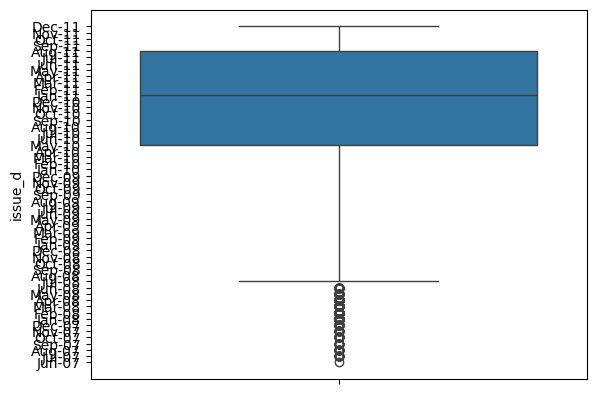



No of unique values in the column:  2


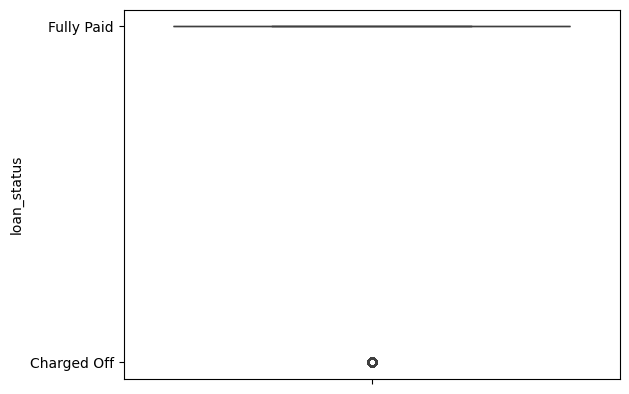



No of unique values in the column:  1


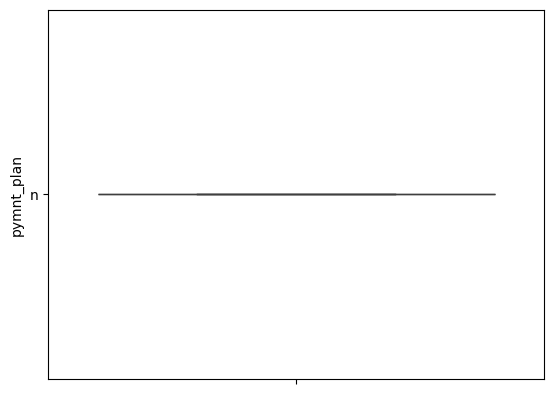



No of unique values in the column:  14


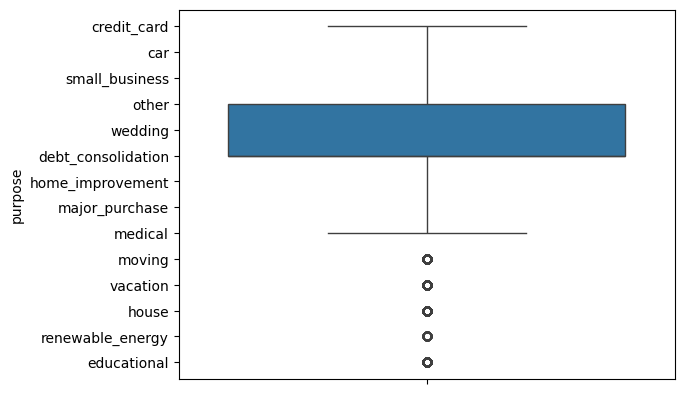



No of unique values in the column:  50


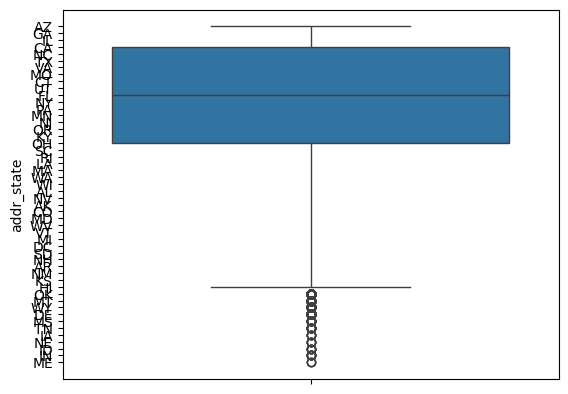



No of unique values in the column:  524


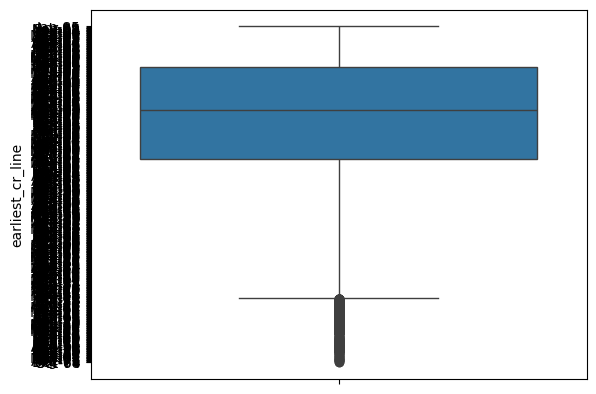



No of unique values in the column:  1088


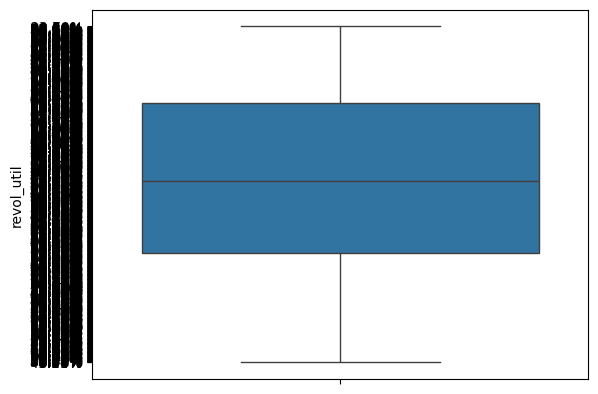



No of unique values in the column:  1


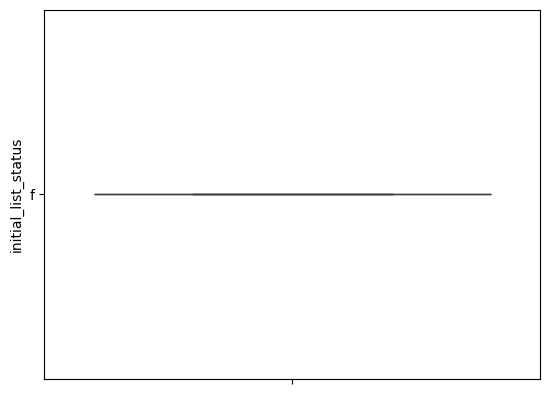



No of unique values in the column:  101


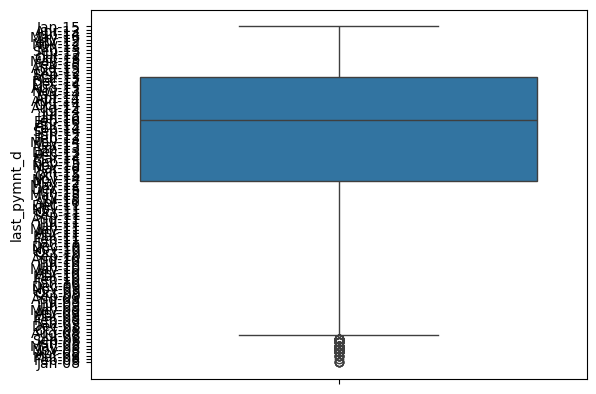



No of unique values in the column:  106


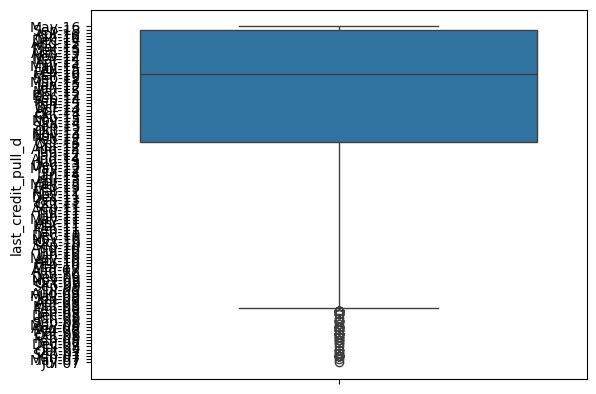



No of unique values in the column:  1


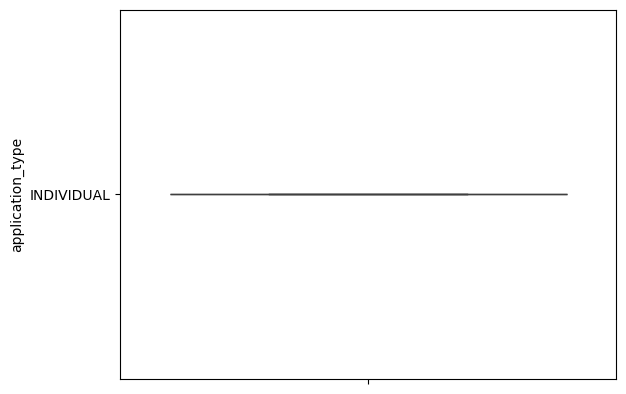

In [59]:
for col in df.select_dtypes(include='object'):
  print("No of unique values in the column: ", df[col].nunique())
  sns.boxplot(df[col])
  plt.show()
  print("\n")

##### Observation

From the above plots we came across some columns having only 1 value throughout

Dropping columns with only 1 value

In [60]:
cols = ["pymnt_plan", "initial_list_status", "application_type"]
df.drop(columns=cols, axis=1, inplace=True)

Identifying outliers using boxplots for numeric data

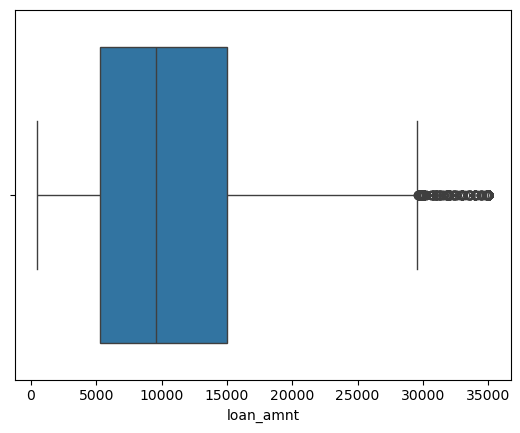

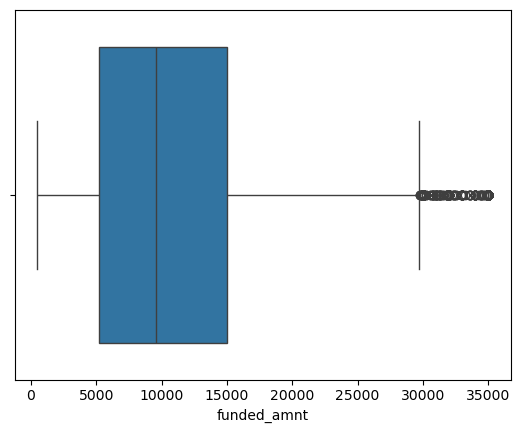

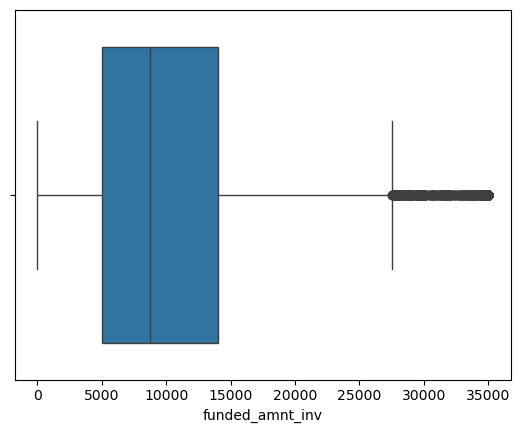

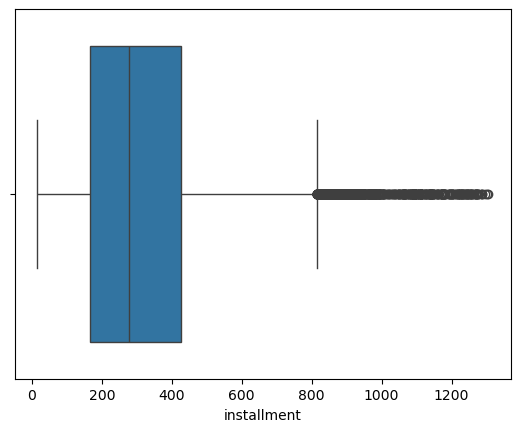

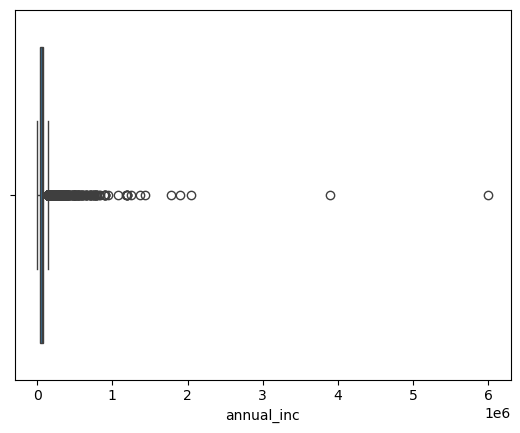

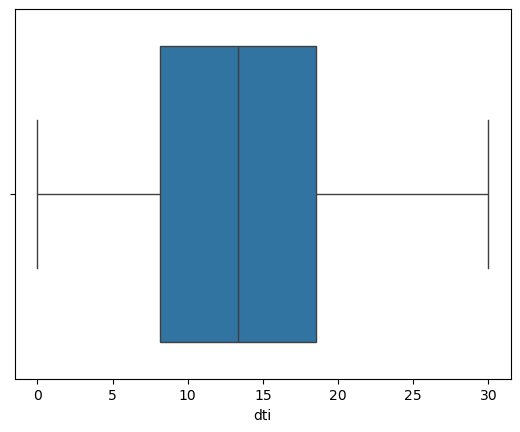

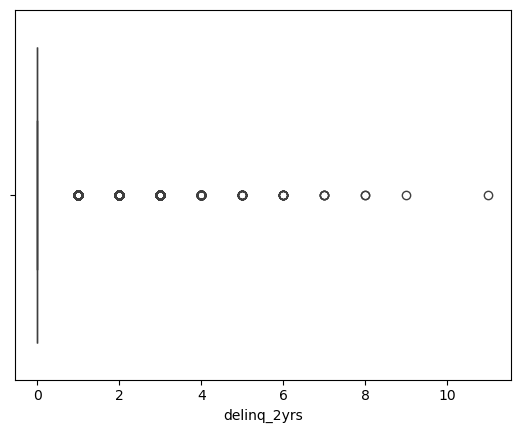

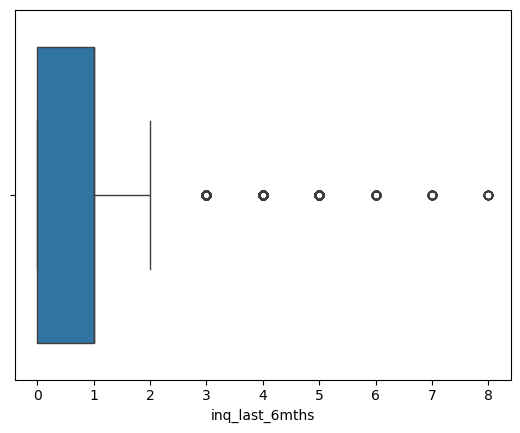

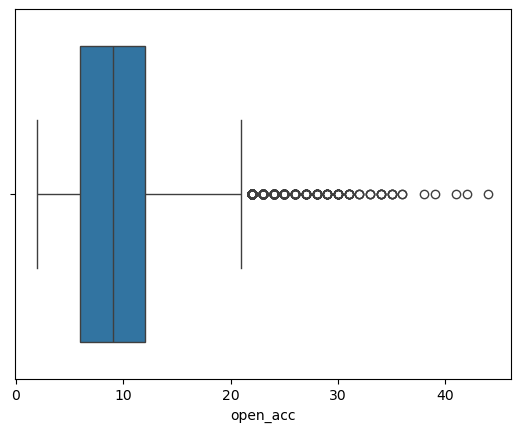

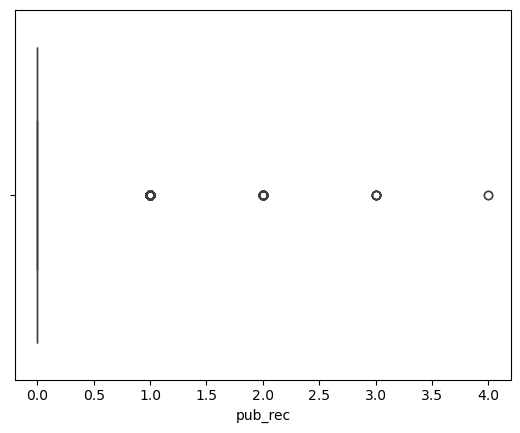

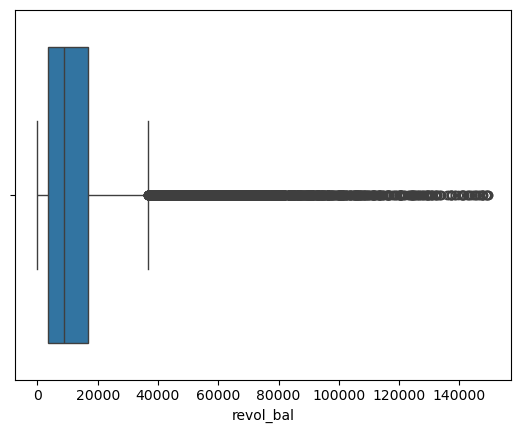

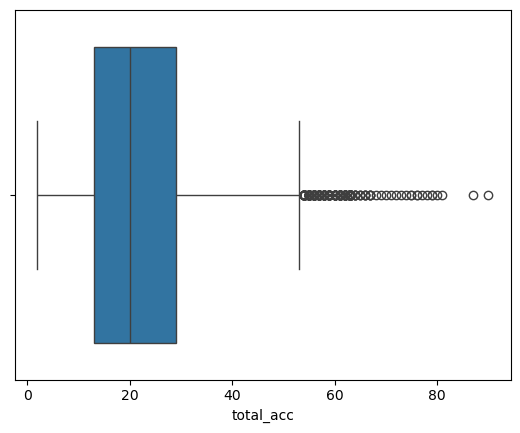

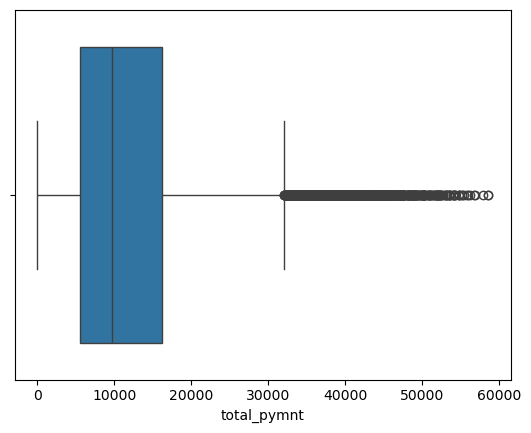

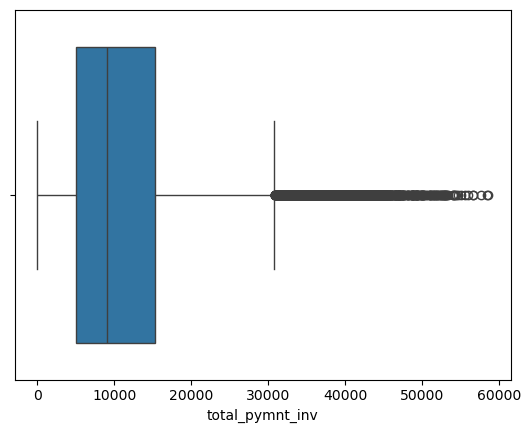

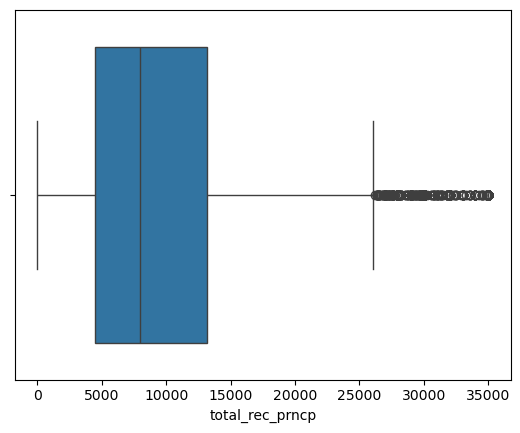

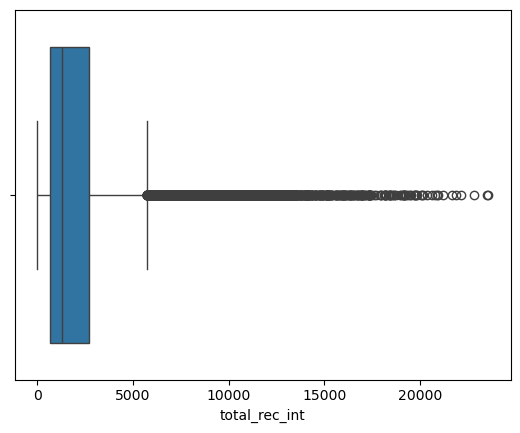

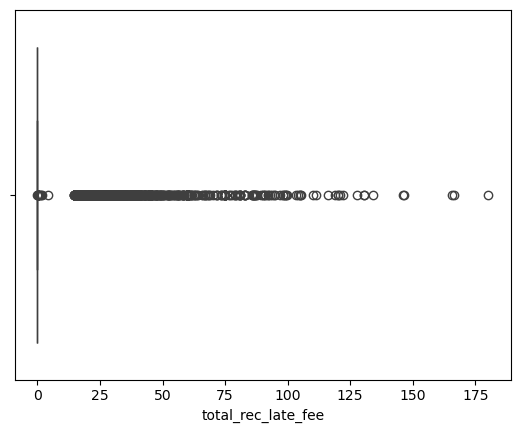

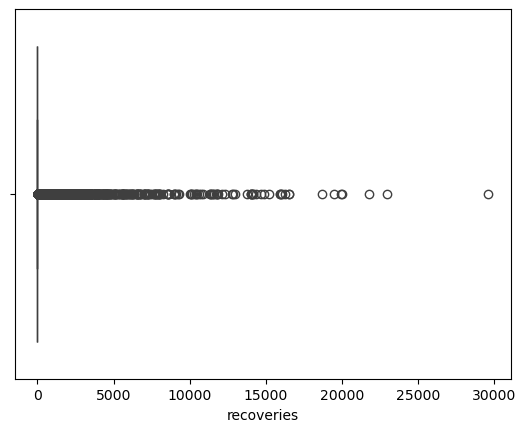

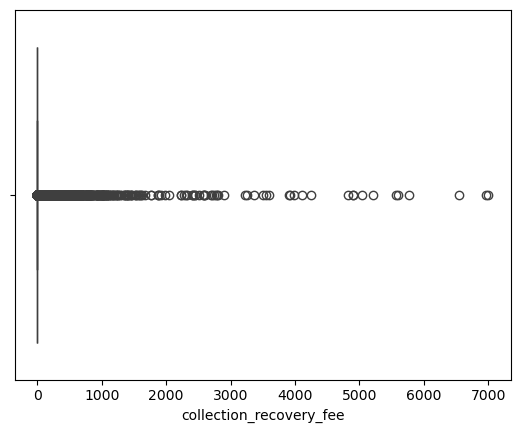

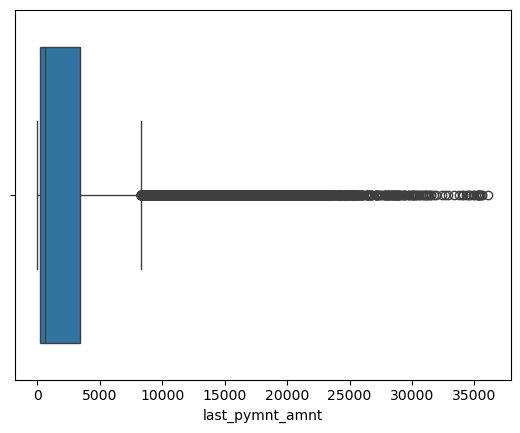

In [61]:
for column in df.select_dtypes(include=['int64', 'float64']):
  sns.boxplot(x=df[column])
  plt.show()
  print("\n")

Analysing outliers in annual_inc column

In [62]:
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Deriving quantile information on annual_inc column

In [63]:
df.annual_inc.quantile([0.50, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

##### Observation

on reviewing the statistical info on annual_inc column, to remove the outliers, we can consider a threshold quantile at 0.95 or 95% and select data that is less than or equal to out threshold

In [64]:
thrshld = df.annual_inc.quantile(0.95)
df = df[df.annual_inc <= thrshld]

<Axes: ylabel='annual_inc'>

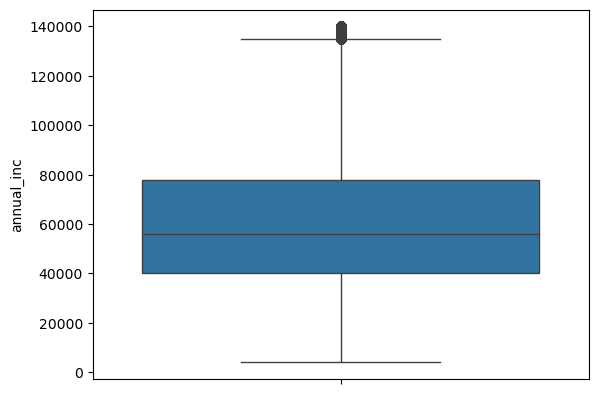

In [65]:
sns.boxplot(df.annual_inc)

Analysing pub_rec column

In [66]:
df.pub_rec.describe()

count    36654.000000
mean         0.056829
std          0.240307
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [67]:
df.pub_rec.value_counts()

pub_rec
0    34635
1     1965
2       46
3        6
4        2
Name: count, dtype: int64

##### Observation

With pub_rec column has maximum values accumulated at value = 0, and very few values scattered, which tend to add bias to our analysis

We can drop pub_rec column

In [68]:
df.drop(columns=["pub_rec"], axis=1, inplace=True)

##### Observation

For rest of the columns containing outliers, since the values are continous we can ignore these values

In [69]:
df.shape

(36654, 34)

In [70]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16


In [71]:
df[:1].transpose()

,0
loan_amnt,5000
funded_amnt,5000
funded_amnt_inv,4975.0
term,36 months
int_rate,10.65%
installment,162.87
grade,B
sub_grade,B2
emp_length,10+ years
home_ownership,RENT


Transforming int_rate and revol_util columns for analysis

Seggregating year and month from issus_d for analysis

In [72]:
df.int_rate = df.int_rate.apply(lambda x: x.rstrip("%")).astype(float)
df.revol_util = df.revol_util.apply(lambda x: x.rstrip("%")).astype(float)

In [73]:
issue_d_col = df.issue_d.str.split("-", expand=True)
df["issue_month"] = issue_d_col[0]
df["issue_year"] = issue_d_col[1].apply(lambda x: "20" + x)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,Dec,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,Dec,2011


# Univariate Analysis

<Axes: xlabel='loan_amnt'>

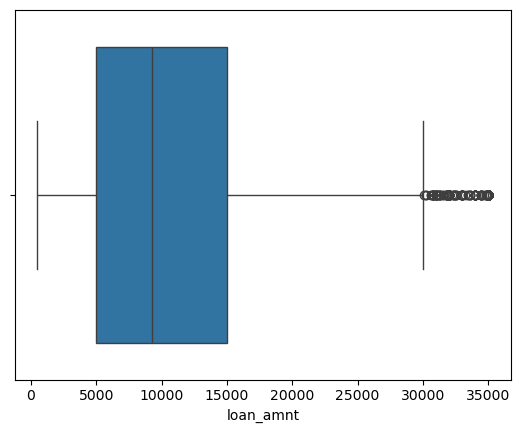

In [74]:
sns.boxplot(df, x='loan_amnt')

##### Observation

The maximum number off loans requested is between 5000 and 15000

<Axes: xlabel='term', ylabel='count'>

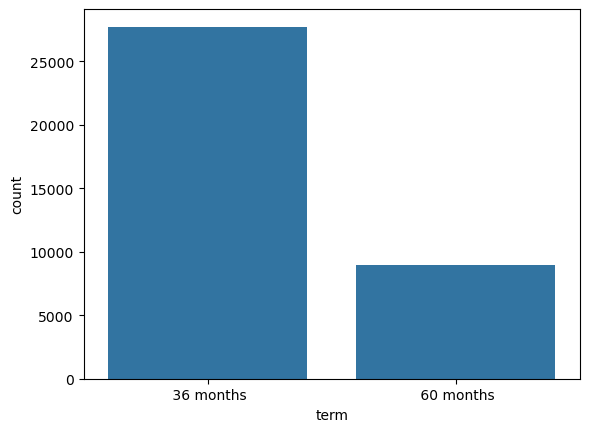

In [75]:
sns.countplot(df, x='term')

##### Observation

Majority of the loans are requested for the duration of 36 months

<Axes: xlabel='grade', ylabel='count'>

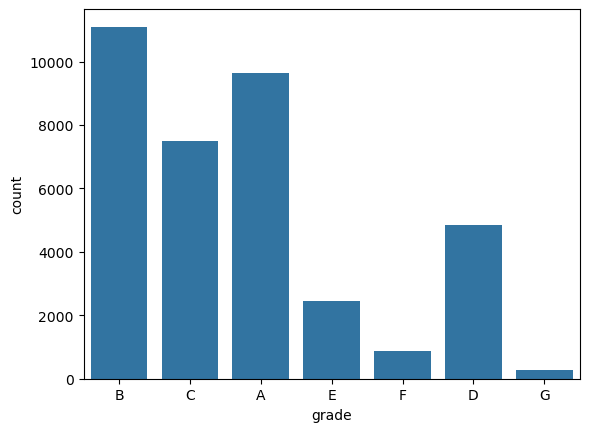

In [76]:
sns.countplot(df, x="grade")

##### Observation

Majority loans distributed are given grades B, A, and C by the bank

<Axes: xlabel='sub_grade', ylabel='count'>

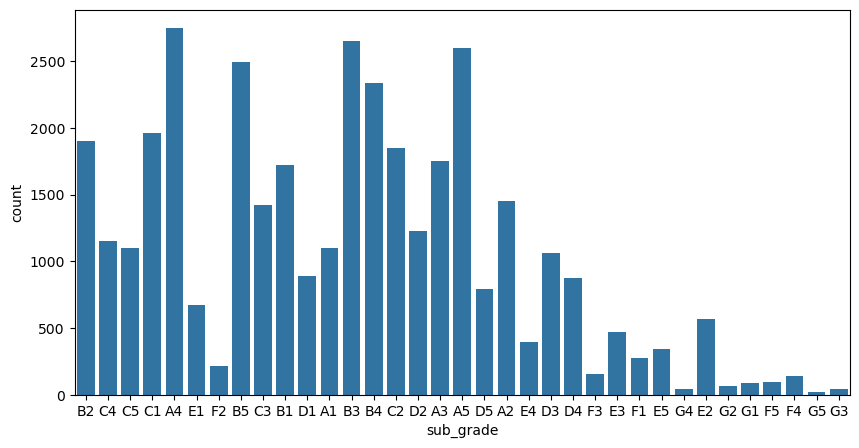

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(df, x="sub_grade")

##### Observation

The subgrades A4, B3, A5, B5, and B4 are most popular loan grades

# Bivariate Analysis

<Axes: xlabel='loan_amnt', ylabel='Count'>

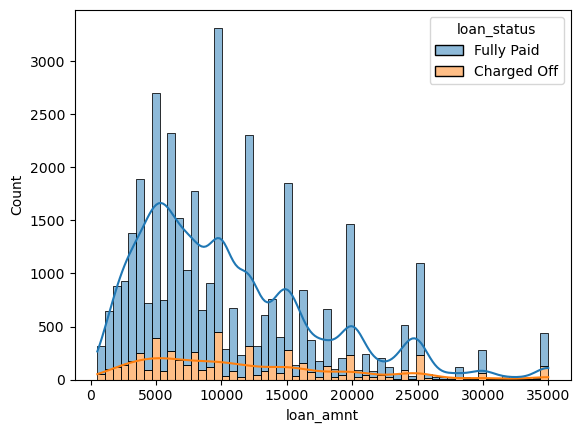

In [78]:
sns.histplot(df, x='loan_amnt', hue='loan_status', multiple='stack', kde=True)

##### Observation

Majority of defaulters tend to request loan_amnt to be lower

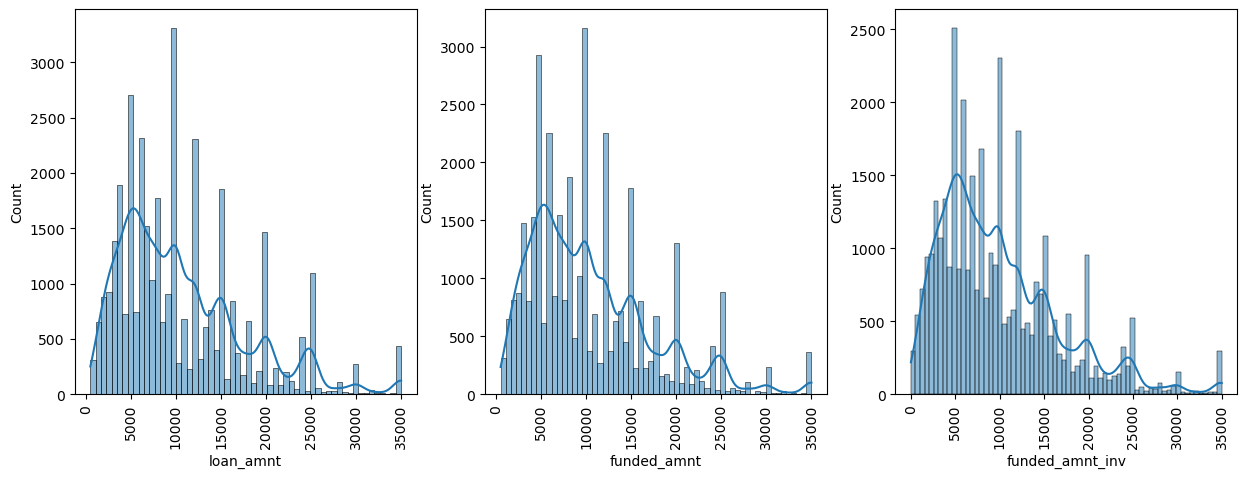

In [79]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax=sns.histplot(df['loan_amnt'],kde=True)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax=sns.histplot(df['funded_amnt'],kde=True)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
ax = sns.histplot(df['funded_amnt_inv'],kde=True)
plt.xticks(rotation=90)

plt.show()

##### Observation

Diatribution for loan_amnt, funded_amnt, and funded_amnt_inv columns are similar

<Axes: xlabel='installment', ylabel='Count'>

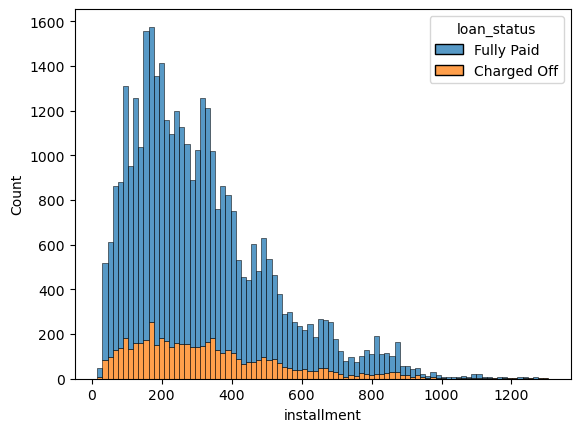

In [80]:
sns.histplot(df, x='installment', hue='loan_status', multiple='stack')

##### Observation

Majority default customers tend to choose lower monthly installment amount

<Axes: xlabel='term', ylabel='count'>

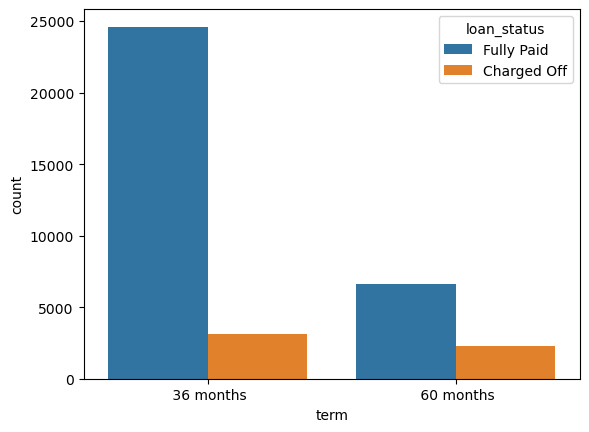

In [81]:
sns.countplot(df, x="term", hue='loan_status')

##### Observation


Customers choosing longer loan term/duration tend to default more compared to shorter term

<Axes: xlabel='int_rate', ylabel='Count'>

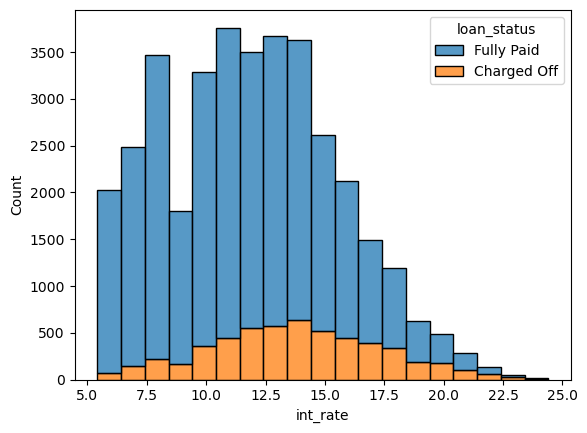

In [82]:
sns.histplot(df, x="int_rate", binwidth=1, hue='loan_status', multiple='stack')

##### Observation

Majority of the default customers have interest rates between 12 and 15

<Axes: xlabel='emp_length', ylabel='count'>

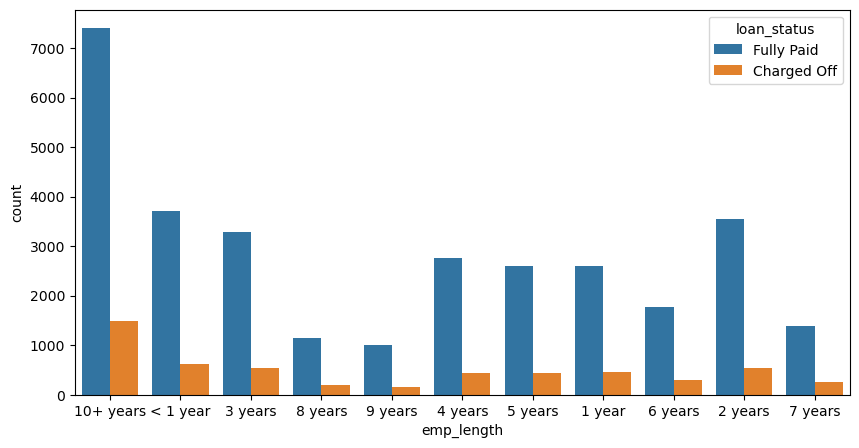

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(df, x="emp_length", hue='loan_status')

##### Observation

Employees with experience more than 10 years tend to default frequently compared to less experience employees

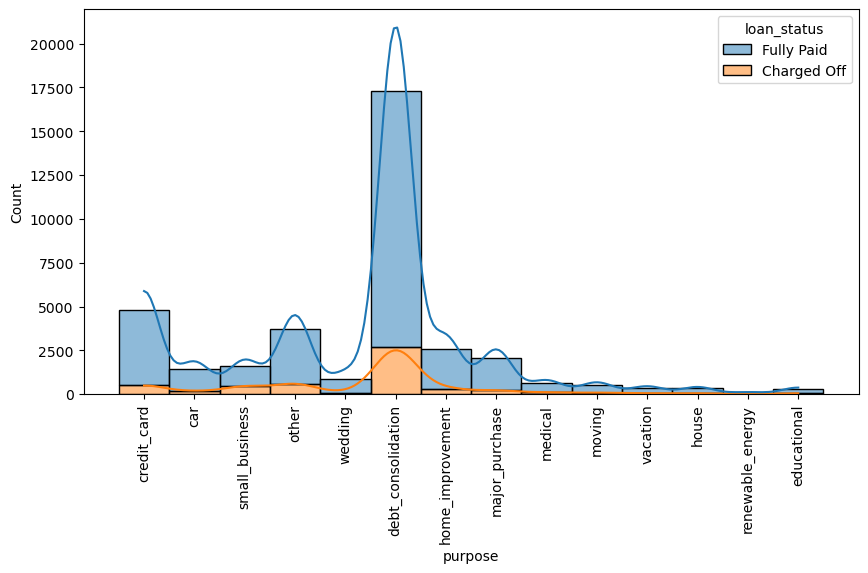

In [84]:
plt.figure(figsize=(10,5))
sns.histplot(df, x="purpose", hue='loan_status', multiple='stack', kde=True)
plt.xticks(rotation=90)
plt.show()

##### Observation

Majority loan defaulters state purpose as debt_consolidation

<Axes: xlabel='home_ownership', ylabel='count'>

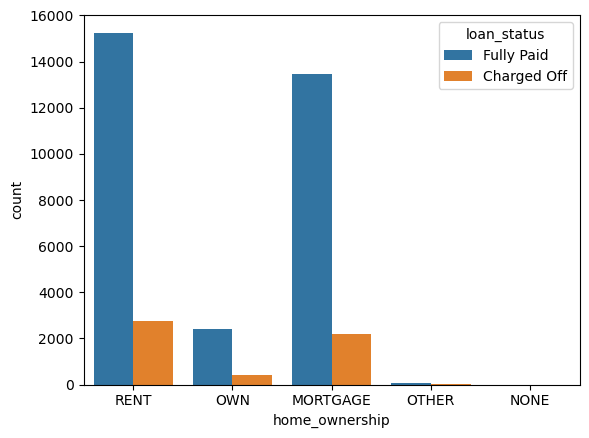

In [85]:
sns.countplot(df, x="home_ownership", hue='loan_status')

##### Observation

Employees who have their home on rent or mortgage tend to default more compared to employees having own houses

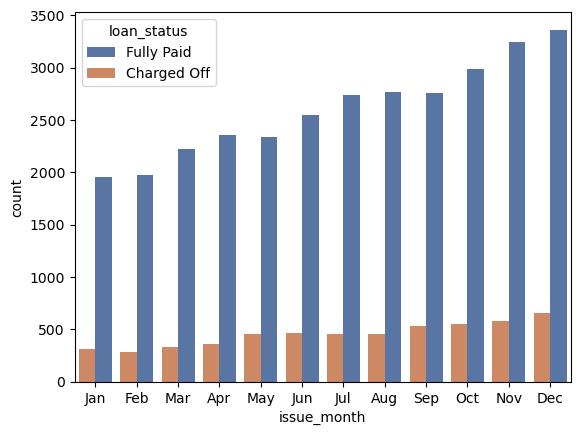

In [86]:
sns.countplot(df, x="issue_month", hue='loan_status', palette='deep')
plt.gca().invert_xaxis()


##### Observation

Majority of the customers requesting loan in Q4 tend to Fully Pay (NOT DEFAULT) the loan compaerd to other quaters

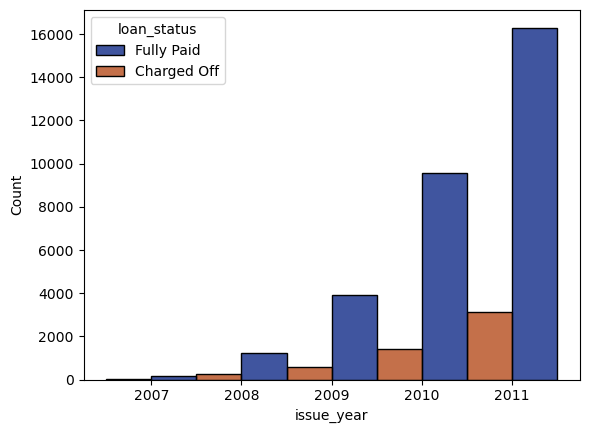

In [87]:
sns.histplot(df, x="issue_year", hue='loan_status', multiple='dodge', palette='dark')
plt.gca().invert_xaxis()

##### Observation

2011 saw the highest number of default customers

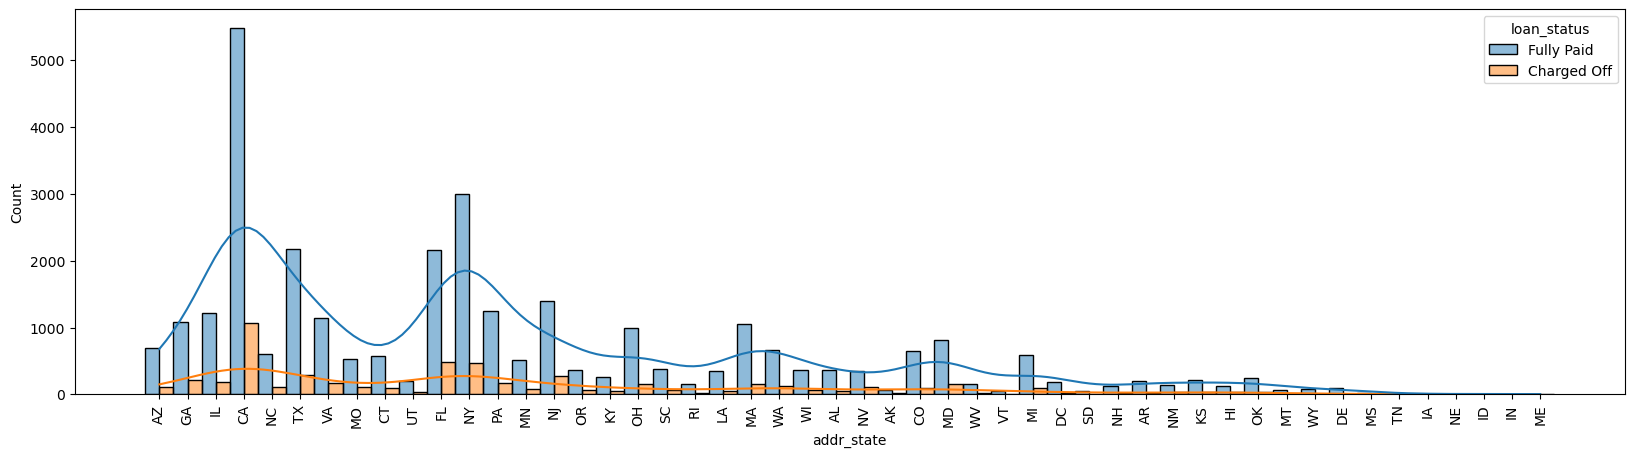

In [88]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="addr_state", hue='loan_status', multiple="dodge", kde=True)
plt.xticks(rotation=90)
plt.show()

##### Observation

Cities CA, NY, and FL has the record for maximum number of defaulters

<Axes: xlabel='loan_amnt', ylabel='installment'>

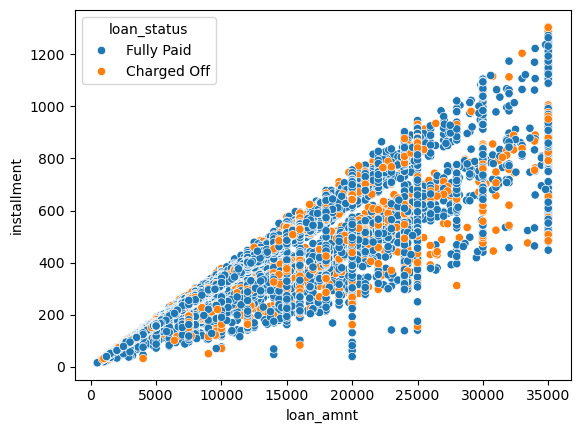

In [89]:
sns.scatterplot(df, x="loan_amnt", y="installment", hue="loan_status")

##### Observation

Columns loan_amnt and installment have strong positive correlation (linear relation)

<Axes: xlabel='total_acc', ylabel='open_acc'>

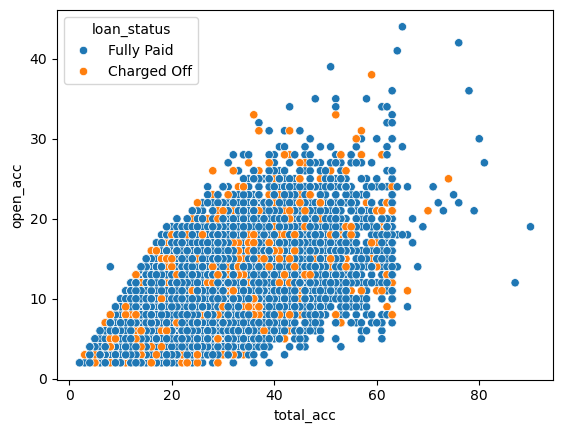

In [90]:
sns.scatterplot(df, x="total_acc", y="open_acc", hue="loan_status")

##### Observation

There is a linear correlation between open_acc (number on outstanding loans) and total_acc (number of loans closed)

<Axes: >

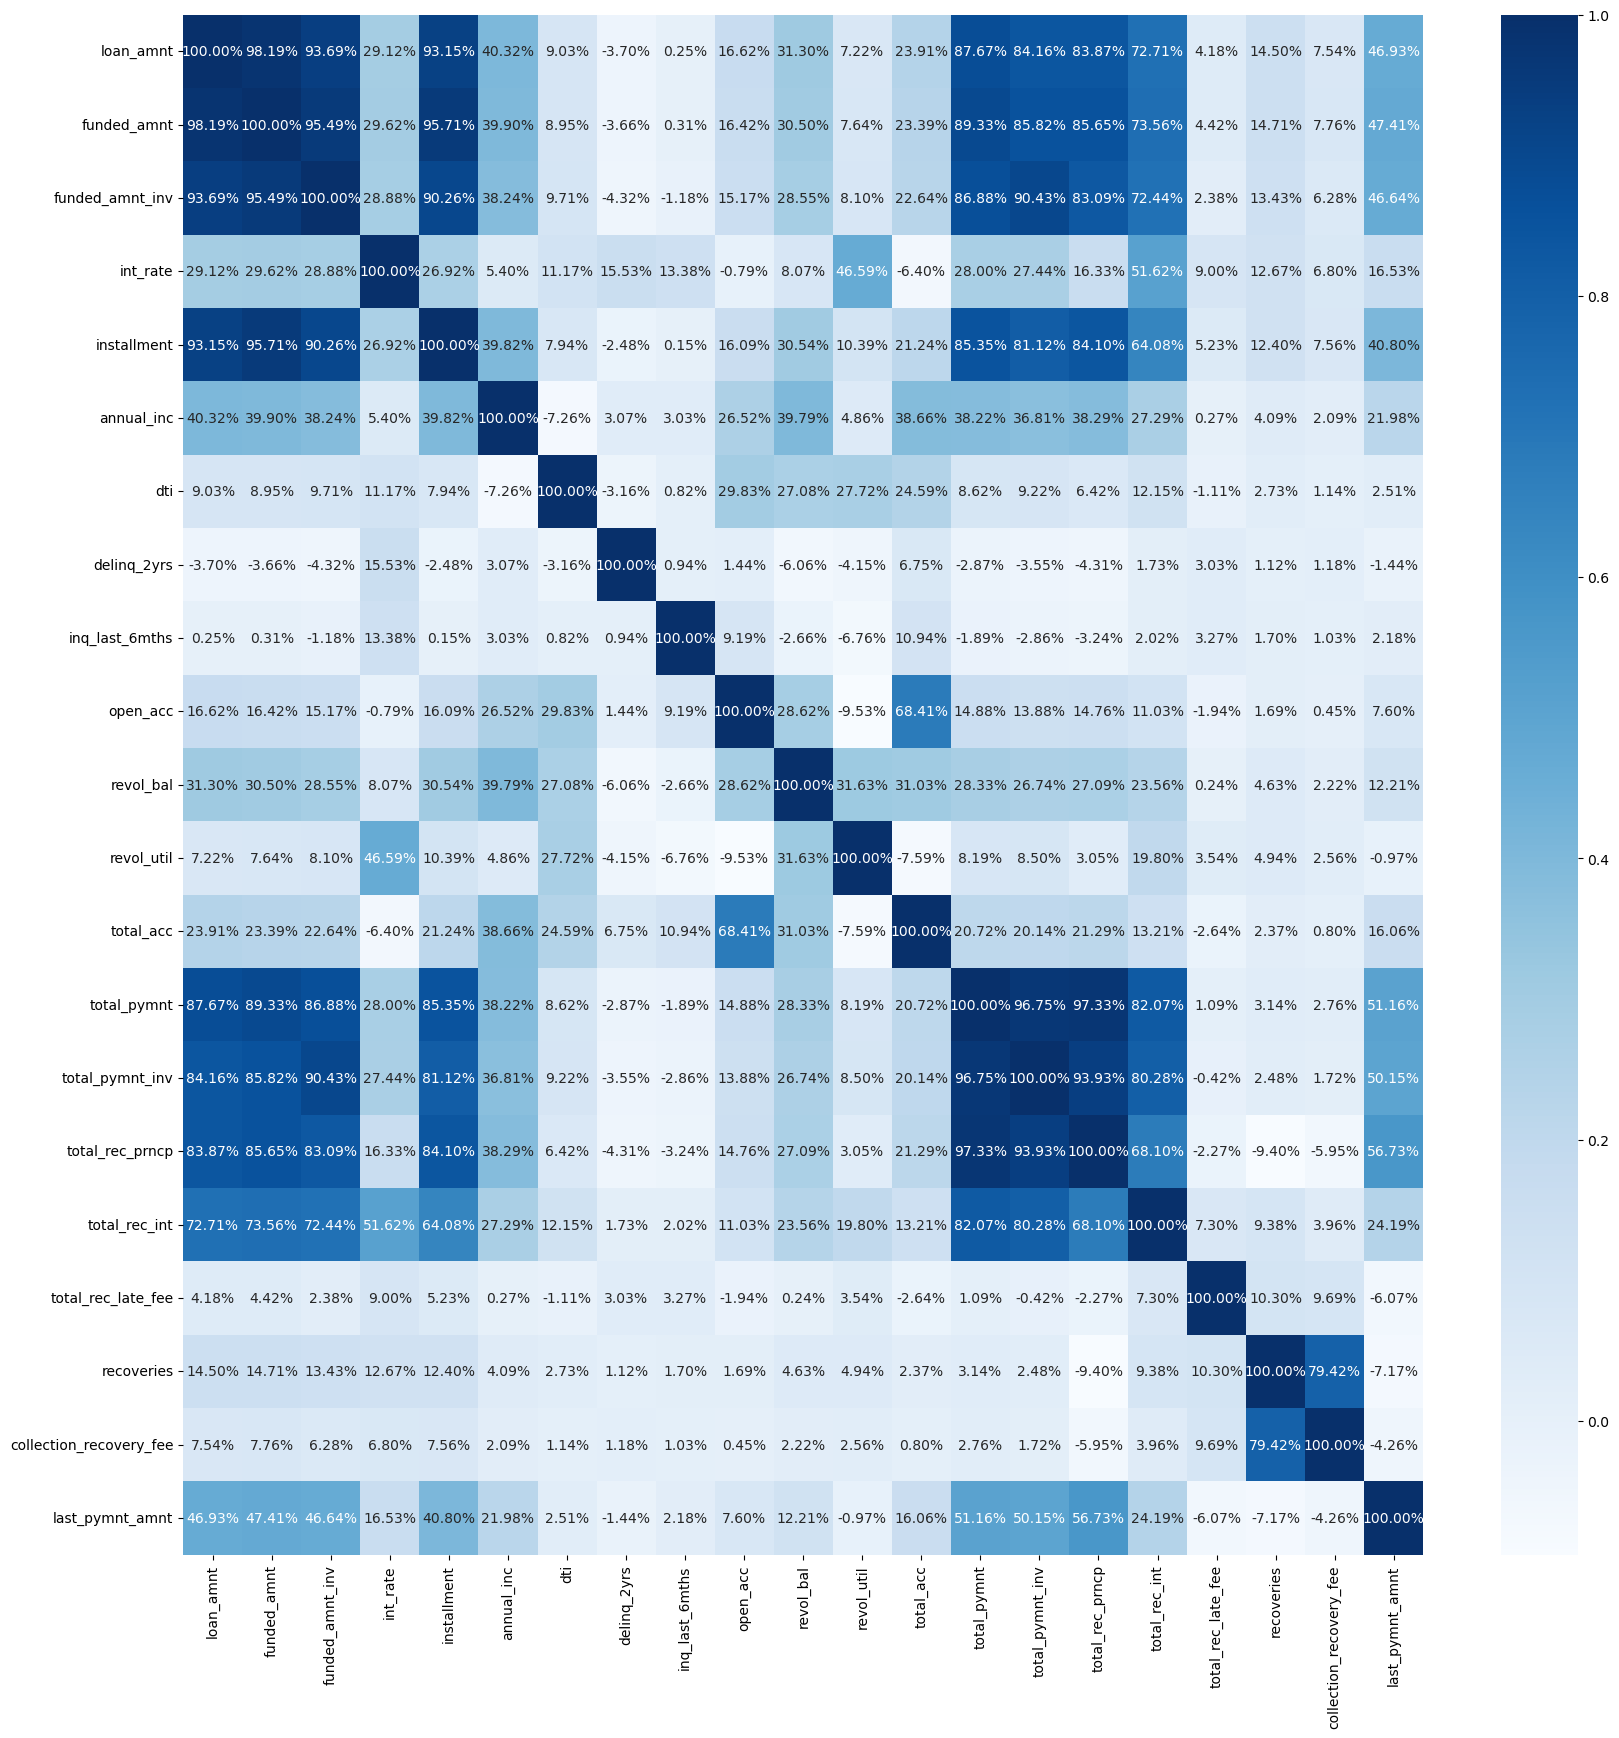

In [91]:
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(exclude="object").corr(), annot=True, fmt=".2%", cmap="Blues")

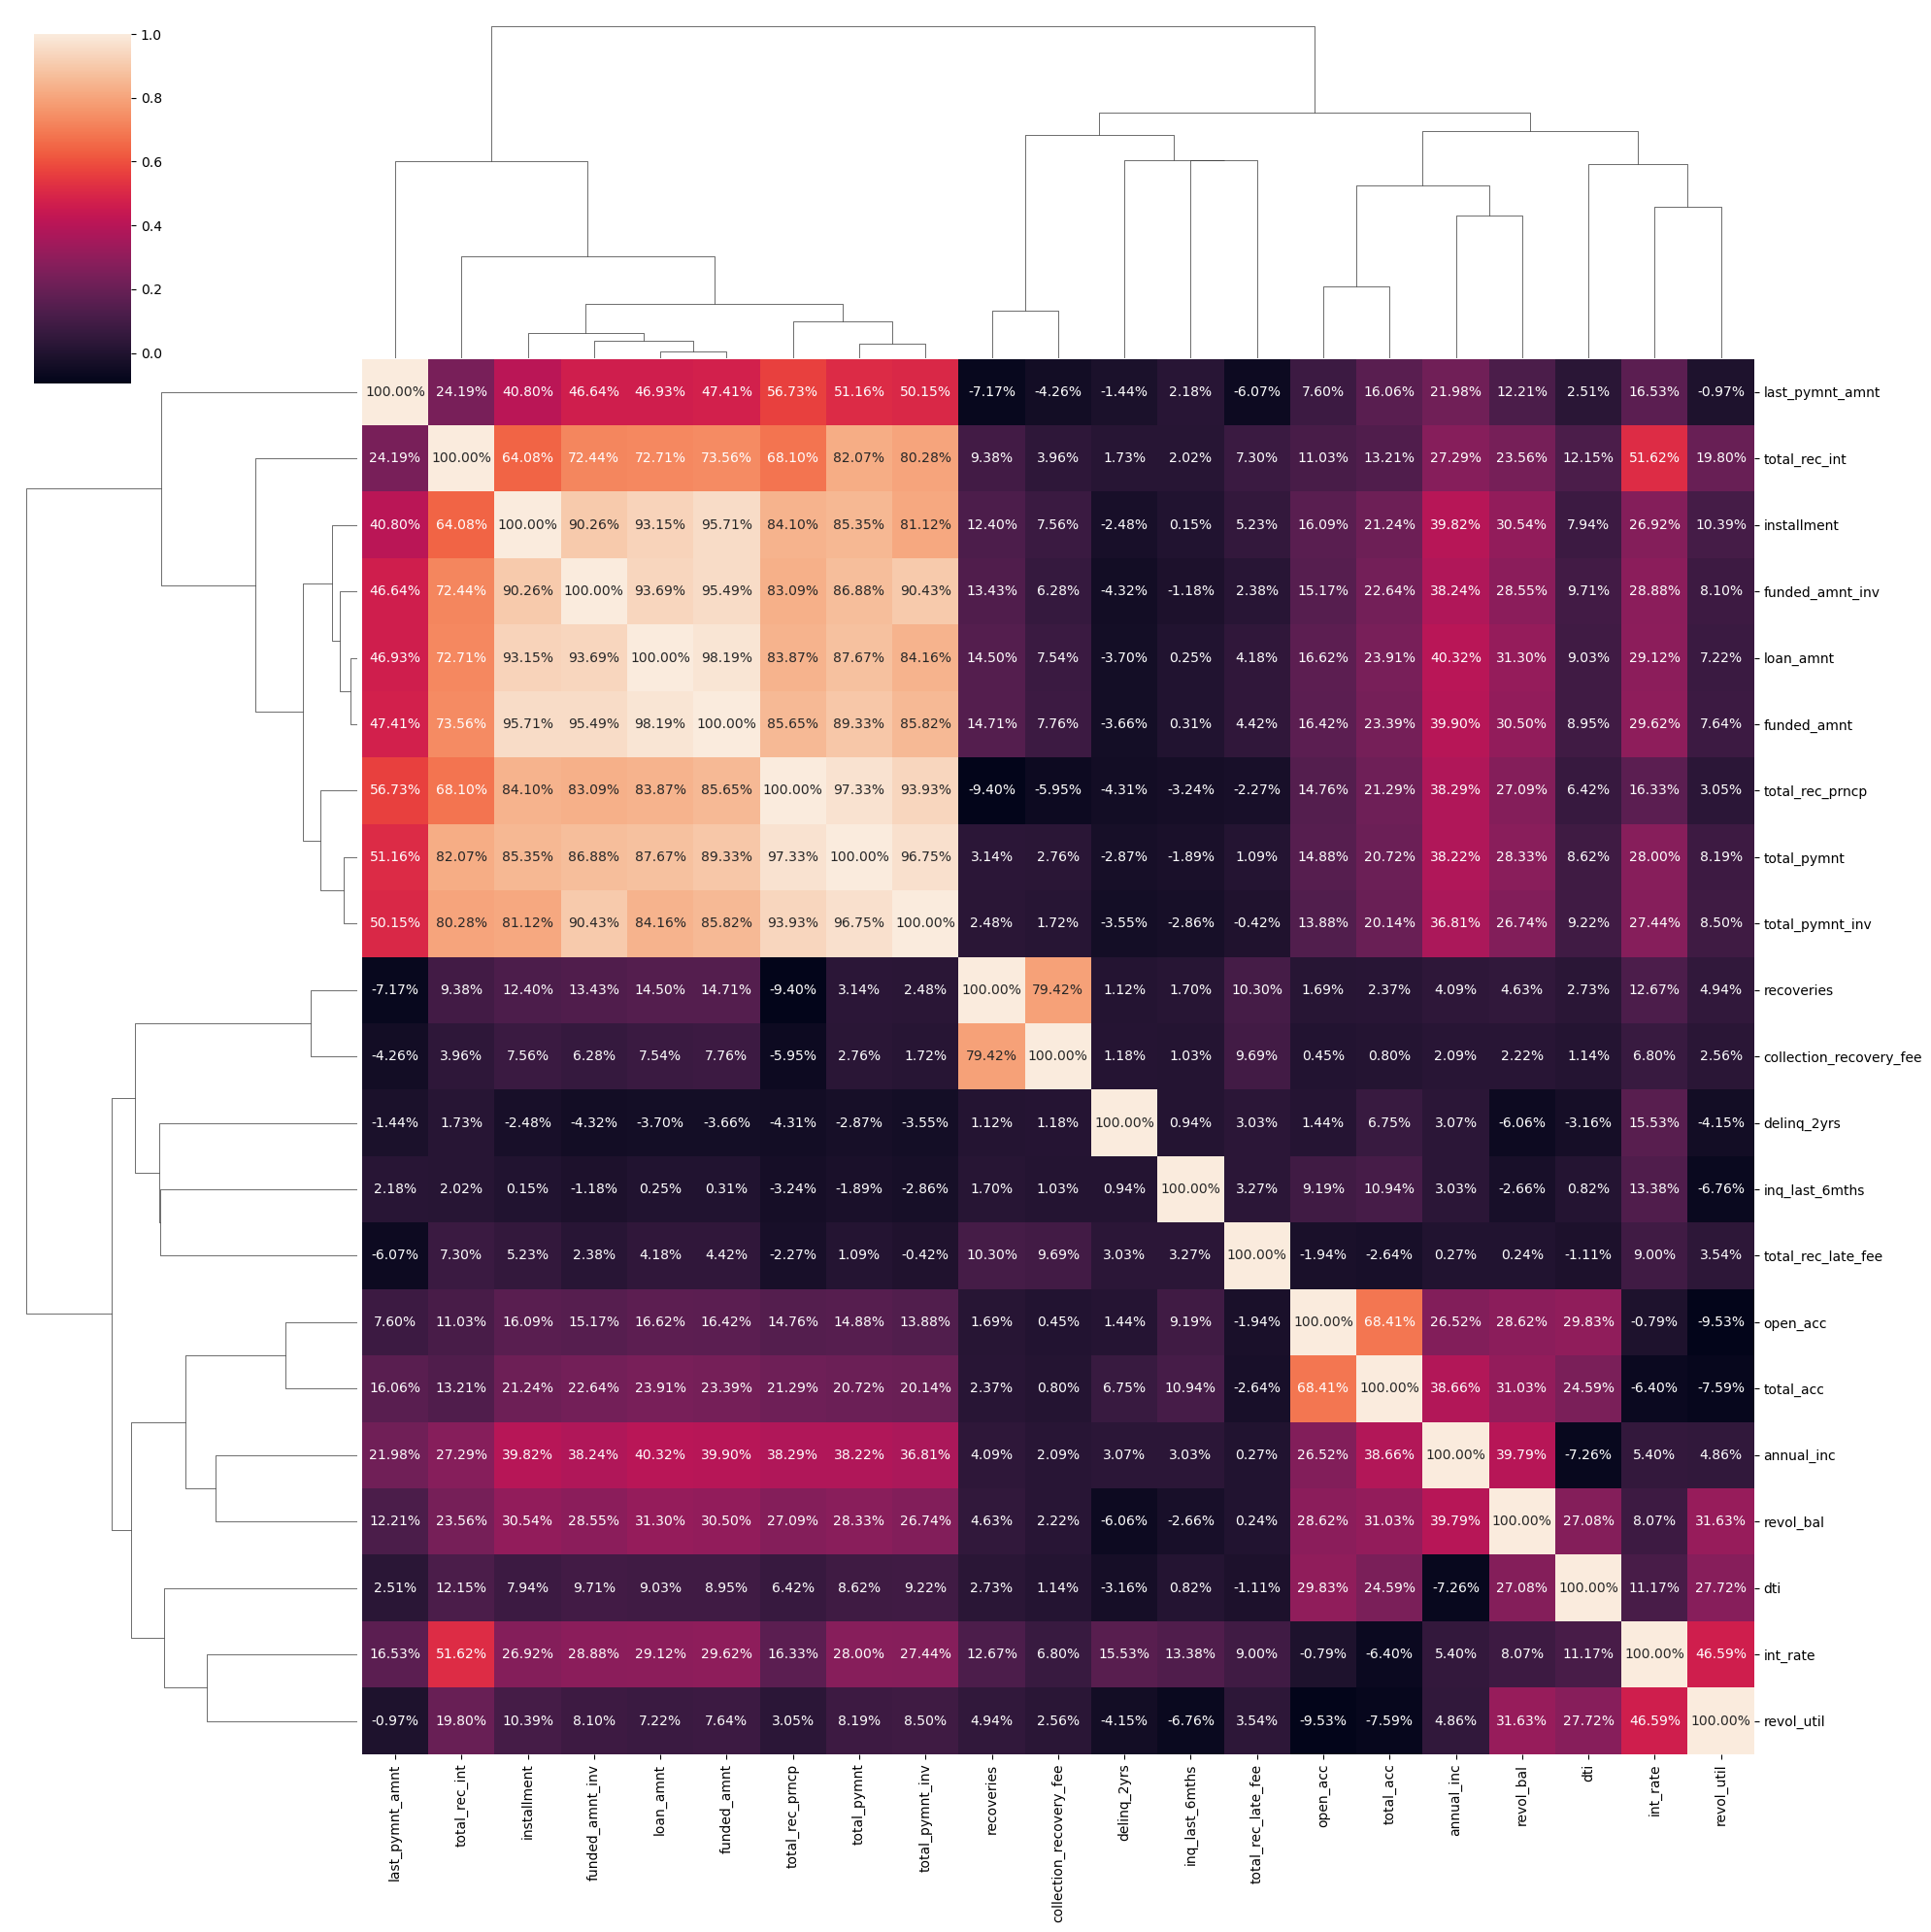

In [92]:
sns.clustermap(df.select_dtypes(exclude="object").corr(),annot=True,fmt='.2%',figsize=(20,20))
plt.show()